# Training a Convolutional Neural Network on Images

## Imports

In [1]:
import keras
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.utils import np_utils
from __future__ import division

from __future__ import print_function
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
import os
from scipy import misc
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.


## Reading the dataset, making labels

In [31]:
counter = -1
labels = np.empty(0,dtype=int)
images = np.array([])
for folder in os.listdir('Processed Data Set'):
    if(folder != '.DS_Store' and folder != '_DS_Store'):
        counter += 1
        for file in os.listdir('Processed Data Set/' + folder):
            if(file != '.DS_Store' and file != '_DS_Store'):
#                 print('Processed Data Set/' + folder + '/' + file)
                labels = np.append(labels, [counter])
                images = np.append(images, [misc.imread('Processed Data Set/' + folder + '/' + file)])
a = np.asarray([255])
images = a - images
len(images)

2555904

In [32]:
images = images.reshape(832,32,32,3)
a = images[:,:,:,0]
a = a.reshape(832,32,32,1)

0

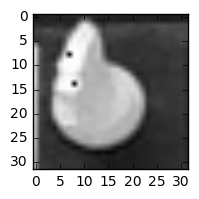

In [71]:
plt.figure(figsize=(2, 2))
plt.imshow(images[380], cmap='gray')
labels[1]

In [73]:
labels = np_utils.to_categorical(labels, 6)

In [74]:
batch_size = 128
nb_classes = 6
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 32, 32
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)
input_shape = (32,32,1)

X_train, X_test, Y_train, Y_test = train_test_split(a, labels, test_size=0.2, random_state=0)

In [75]:
X_train.shape

(665, 32, 32, 1)

In [76]:
Y_train.shape

(665, 6)

In [79]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 665 samples, validate on 167 samples
Epoch 1/12
665/665 [==============================] - 2s - loss: 11.0798 - acc: 0.2015 - val_loss: 7.4994 - val_acc: 0.4611
Epoch 2/12
665/665 [==============================] - 2s - loss: 3.7777 - acc: 0.5203 - val_loss: 1.0503 - val_acc: 0.8024
Epoch 3/12
665/665 [==============================] - 2s - loss: 1.2494 - acc: 0.7293 - val_loss: 1.1135 - val_acc: 0.6168
Epoch 4/12
665/665 [==============================] - 2s - loss: 2.2705 - acc: 0.6090 - val_loss: 0.9117 - val_acc: 0.8024
Epoch 5/12
665/665 [==============================] - 2s - loss: 1.0217 - acc: 0.7579 - val_loss: 0.4056 - val_acc: 0.8563
Epoch 6/12
665/665 [==============================] - 2s - loss: 0.3582 - acc: 0.8872 - val_loss: 0.2850 - val_acc: 0.8922
Epoch 7/12
665/665 [==============================] - 2s - loss: 0.2948 - acc: 0.9053 - val_loss: 0.2639 - val_acc: 0.9042
Epoch 8/12
665/665 [==============================] - 2s - loss: 0.3701 - acc: 0.8827 - val_